In [1]:
#Importing Functions, Libraries and Viz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydataset
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.preprocessing
# Exploring
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import env
import os
import wrangle


### Exercises
### Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### 2. Answer those questions through a mix of statistical tests and visualizations.

## Acquire!

In [2]:
#acquire data
df = wrangle.get_zillow_data()
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,typeconstructiondesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,propertylandusedesc,storydesc,heatingorsystemdesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,Central
4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,"60,371,236,012,000.00",0.01,2017-01-01,NaN,Central,NaN,NaN,Condominium,NaN,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,2864704,10833991,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,"60,371,319,001,006.00",-0.00,2017-09-20,NaN,Central,NaN,NaN,Condominium,NaN,Central
77376,673515,11000655,NaN,NaN,NaN,2.00,2.00,NaN,6.00,2.00,...,"60,371,014,003,002.00",0.02,2017-09-20,NaN,NaN,NaN,NaN,Single Family Residential,NaN,Central
77377,2968375,17239384,NaN,NaN,NaN,2.00,4.00,NaN,NaN,2.00,...,"61,110,084,022,016.00",0.01,2017-09-21,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77378,1843709,12773139,1.00,NaN,NaN,1.00,3.00,NaN,4.00,1.00,...,"60,374,338,022,005.00",0.04,2017-09-21,NaN,Central,NaN,NaN,Single Family Residential,NaN,Central


In [3]:
df.isnull().sum()

id                                  0
parcelid                            0
airconditioningtypeid           52427
architecturalstyletypeid        77174
basementsqft                    77330
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             77365
buildingqualitytypeid           27709
calculatedbathnbr                 609
decktypeid                      76766
finishedfloor1squarefeet        71357
calculatedfinishedsquarefeet      196
finishedsquarefeet12             3632
finishedsquarefeet13            77339
finishedsquarefeet15            74371
finishedsquarefeet50            71357
finishedsquarefeet6             76994
fips                                0
fireplacecnt                    69104
fullbathcnt                       609
garagecarcnt                    51906
garagetotalsqft                 51906
hashottuborspa                  75842
heatingorsystemtypeid           27941
latitude                            0
longitude   

In [7]:
df1 = df.copy()
wrangle.handle_missing_values(df1, .6, .1)

Before dropping nulls, 77380 rows, 68 cols
After dropping nulls. 77380 rows. 34 cols


,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,1727539,14297519,3.50,4.00,NaN,3.50,"3,100.00","3,100.00","6,059.00",3.00,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,NaN
1,1387261,17052889,1.00,2.00,NaN,1.00,"1,465.00","1,465.00","6,111.00",1.00,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,NaN
2,11677,14186244,2.00,3.00,NaN,2.00,"1,243.00","1,243.00","6,059.00",2.00,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,NaN
3,2288172,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,Central
4,1970746,10887214,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,...,"73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",0.01,2017-01-01,Condominium,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,2864704,10833991,3.00,3.00,8.00,3.00,"1,741.00","1,741.00","6,037.00",3.00,...,"265,000.00","379,000.00","2,016.00","114,000.00","4,685.34","60,371,319,001,006.00",-0.00,2017-09-20,Condominium,Central
77376,673515,11000655,2.00,2.00,6.00,2.00,"1,286.00","1,286.00","6,037.00",2.00,...,"70,917.00","354,621.00","2,016.00","283,704.00","4,478.43","60,371,014,003,002.00",0.02,2017-09-20,Single Family Residential,Central
77377,2968375,17239384,2.00,4.00,NaN,2.00,"1,612.00","1,612.00","6,111.00",2.00,...,"50,683.00","67,205.00","2,016.00","16,522.00","1,107.48","61,110,084,022,016.00",0.01,2017-09-21,Single Family Residential,NaN
77378,1843709,12773139,1.00,3.00,4.00,1.00,"1,032.00","1,032.00","6,037.00",1.00,...,"32,797.00","49,546.00","2,016.00","16,749.00",876.43,"60,374,338,022,005.00",0.04,2017-09-21,Single Family Residential,Central


In [8]:
df1.parcelid.value_counts()

14297519    1
14409622    1
10830233    1
10914758    1
11656688    1
           ..
12060775    1
12453636    1
14707754    1
11697485    1
12826780    1
Name: parcelid, Length: 77380, dtype: int64

In [12]:
#check & remove outliers function
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [13]:
df = remove_outliers(df,1.5,['buildingqualitytypeid', 'heatingorsystemdesc'])


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [9]:
df1 = df.copy()
wrangle.handle_missing_values(df1, .6, .1)

Before dropping nulls, 69327 rows, 68 cols
After dropping nulls. 69327 rows. 34 cols


,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,1727539,14297519,3.50,4.00,NaN,3.50,"3,100.00","3,100.00","6,059.00",3.00,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,NaN
1,1387261,17052889,1.00,2.00,NaN,1.00,"1,465.00","1,465.00","6,111.00",1.00,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,NaN
2,11677,14186244,2.00,3.00,NaN,2.00,"1,243.00","1,243.00","6,059.00",2.00,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,NaN
3,2288172,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,Central
4,1970746,10887214,3.00,3.00,8.00,3.00,"1,312.00","1,312.00","6,037.00",3.00,...,"73,681.00","119,407.00","2,016.00","45,726.00","1,533.89","60,371,236,012,000.00",0.01,2017-01-01,Condominium,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77375,2864704,10833991,3.00,3.00,8.00,3.00,"1,741.00","1,741.00","6,037.00",3.00,...,"265,000.00","379,000.00","2,016.00","114,000.00","4,685.34","60,371,319,001,006.00",-0.00,2017-09-20,Condominium,Central
77376,673515,11000655,2.00,2.00,6.00,2.00,"1,286.00","1,286.00","6,037.00",2.00,...,"70,917.00","354,621.00","2,016.00","283,704.00","4,478.43","60,371,014,003,002.00",0.02,2017-09-20,Single Family Residential,Central
77377,2968375,17239384,2.00,4.00,NaN,2.00,"1,612.00","1,612.00","6,111.00",2.00,...,"50,683.00","67,205.00","2,016.00","16,522.00","1,107.48","61,110,084,022,016.00",0.01,2017-09-21,Single Family Residential,NaN
77378,1843709,12773139,1.00,3.00,4.00,1.00,"1,032.00","1,032.00","6,037.00",1.00,...,"32,797.00","49,546.00","2,016.00","16,749.00",876.43,"60,374,338,022,005.00",0.04,2017-09-21,Single Family Residential,Central


## Prepare!

In [10]:
# this function is splitting data to train, validate, and test to avoid data leakage
def split_data(df1):
    '''
    This function performs split on zillow data, stratify assesed value.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123) 
                                            
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123) 
                                    
    return train, validate, test


In [11]:
#Split data
train_validate, test = train_test_split(df, train_size = 0.2, random_state=123)
train, validate = train_test_split(train_validate, train_size = 0.3, random_state=123)
train.shape, validate.shape, test.shape

((4159, 68), (9706, 68), (55462, 68))

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4159 entries, 26449 to 18702
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4159 non-null   int64  
 1   parcelid                      4159 non-null   int64  
 2   airconditioningtypeid         1332 non-null   float64
 3   architecturalstyletypeid      15 non-null     float64
 4   basementsqft                  4 non-null      float64
 5   bathroomcnt                   4159 non-null   float64
 6   bedroomcnt                    4159 non-null   float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         2681 non-null   float64
 9   calculatedbathnbr             4139 non-null   float64
 10  decktypeid                    30 non-null     float64
 11  finishedfloor1squarefeet      337 non-null    float64
 12  calculatedfinishedsquarefeet  4159 non-null   float64
 13

In [13]:
train.fips.value_counts()

6,037.00    2728
6,059.00    1080
6,111.00     351
Name: fips, dtype: int64

## Explore!
 - Ask your question

 - Vizualize it

 - Perform a stats test, if needed

 - Write your takeaway


## Q1 Is logerror significantly different for properties in LA County vs. Orange County vs. Ventura County?

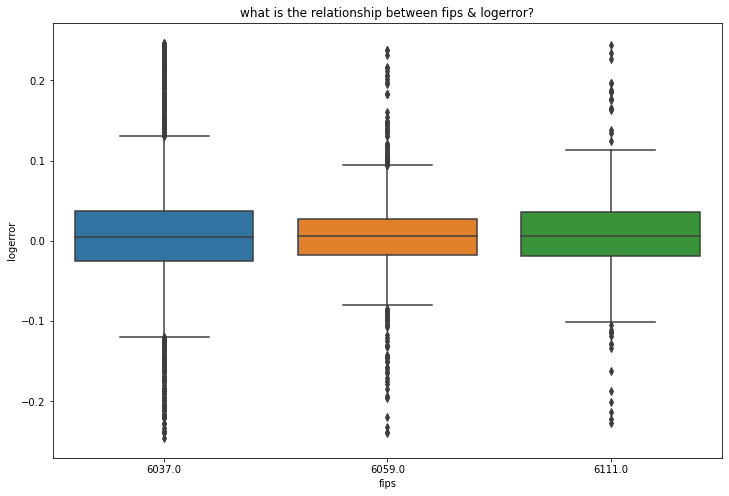

In [35]:
plt.figure(figsize=(12,8))
mask = (train.logerror < 0.25) & (train.logerror > -0.25)
sns.boxplot(data = train[mask], x = 'fips', y = 'logerror');
plt.title('what is the relationship between fips & logerror?')
plt.show()

In [15]:
#la_county = train.fips == 6037.0
#orange_county = train.fips == 6059.0
#ventura_county = train.fips == 6111.0


## Takeaway
 - Here we can see  that there doesn't seem to be any significance difference.
 - Orange & Ventura counties seems to have the same log error.
 - LA county seems to have the highest log error compared to the rest

## Q2 What is the relationship between bedrooms, bathrooms & logerror?

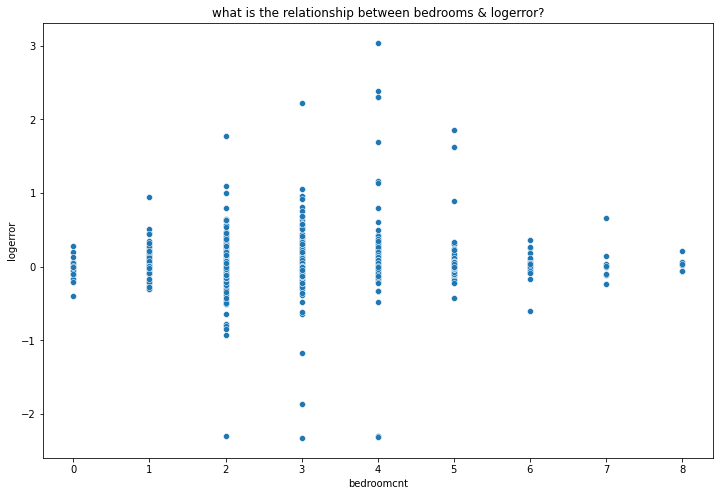

In [43]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = train, x = 'bedroomcnt', y = 'logerror');
plt.title('what is the relationship between bedrooms & logerror?')
plt.show()

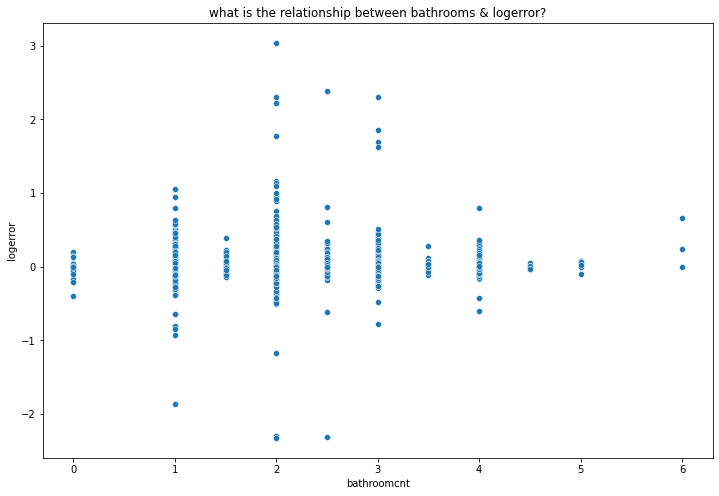

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = train, x = 'bathroomcnt', y = 'logerror');
plt.title('what is the relationship between bathrooms & logerror?')
plt.show()

## Takeway
 - Three & four bedroom houses seems to have the highest logerror
 - Two & three bathroom houses seems to have the highest log error

## Q3 What is the relationship between calculated finished square feet & logerror?

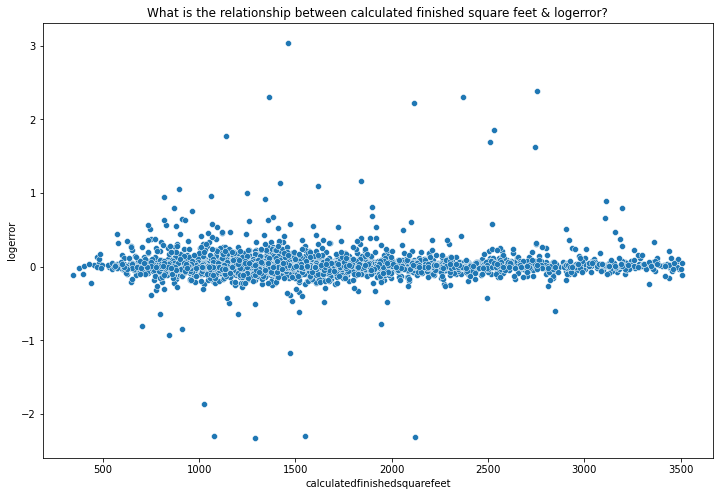

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = train, x = 'calculatedfinishedsquarefeet', y = 'logerror');
plt.title('What is the relationship between calculated finished square feet & logerror?')
plt.show()

## Takeaway
 - There is an even positive & negative log error correlation close to zero.
  

## Q4. What is the relationship between different types of houses & logerror?

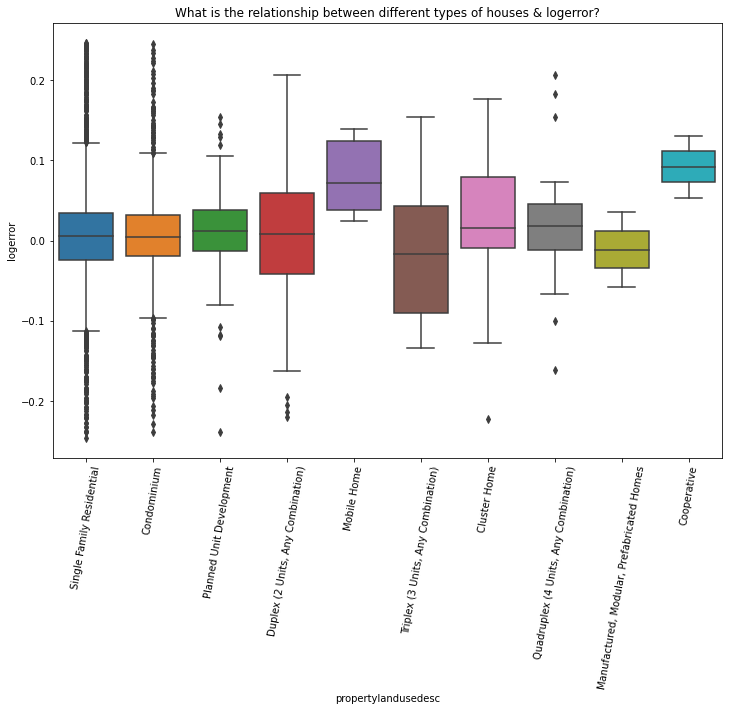

In [39]:
plt.figure(figsize=(12,8))
mask = (train.logerror < 0.25) & (train.logerror > -0.25)
sns.boxplot(data = train[mask], x = 'propertylandusedesc', y = 'logerror')
plt.xticks(rotation = 80);
plt.title('What is the relationship between different types of houses & logerror?')
plt.show()

## Takeaway
### Single family residential & condominium have the highest logerror compared to the rest of the houses

## Q5 What is the relationship between the year the house was built & logerror?

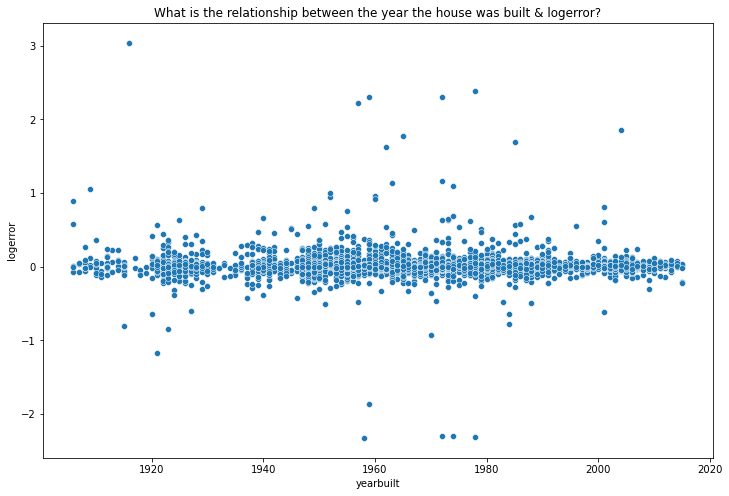

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = train, x = 'yearbuilt', y = 'logerror');
plt.title('What is the relationship between the year the house was built & logerror?')
plt.show()

### Takeaway
 - Houses built between 1960 to 1980 have the highest log error